In [1]:
import pandas as pd
df_wine = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',
header=None
)

In [5]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3,
stratify=y,
random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [6]:
import numpy as np

cov_mat=np.cov(X_train_std.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
print("Eigen Values\n",eigen_vals)

Eigen Values
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [8]:
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i])
for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0],reverse=True)

In [9]:
w=np.hstack((eigen_pairs[0][1][:,np.newaxis],
eigen_pairs[1][1][:,np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [10]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [11]:
X_train_pca=X_train_std.dot(w)

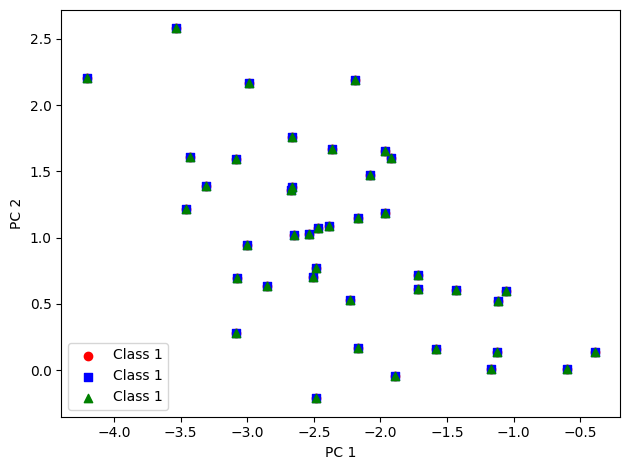

In [13]:
import matplotlib.pyplot as plt
colors=['r','b','g']
markers=['o','s','^']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==1,0],
    X_train_pca[y_train==1,1],
    c=c,label=f'Class {1}',marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [17]:
from ploto import plot_decision_regions

/media/WORK/CODING/rashcka_ml/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


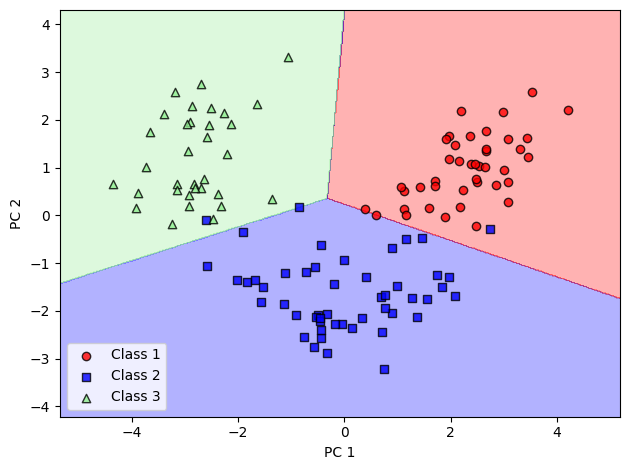

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
lr=LogisticRegression(multi_class='ovr',random_state=1,solver='lbfgs')
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
